In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import re
import string
import matplotlib.pyplot as plt

from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

In [2]:
train_data='''Congress President Rahul Gandhi Friday slammed Prime Minister Narendra Modi alleging he ran his government for 15 of his friends and he wondered why no big-ticket defaulters of bank loans like Vijay Mallya were not in jail. The Congress chief said the ones like Nirav Modi and Vijay Mallya, after taking bank loans, failed to return it and ran away from the country. "Not even a single one is in jail," he added. Gandhi said when his party is voted to power, no farmer "is going to be put in jail for not paying back his bank loan, it is not fair that the richest people do not go to jail but farmers go to jail for the same offence". He alleged the Prime Minister gave Rs 35,0000 crore to Nirav Modi, Rs 35,000 crore to Mehul Choksi and Rs 10,000 crore to Vijay Mallya. During the last five years, Modi ran a government for 15 people and you know the names, he said. "These are Anil Ambani, Mehul Choksi, Nirav Modi and they are Modi's friends," he said addressing a poll rally here. Focusing on his party's Minimum Income Support Scheme 'Nyay,' he said it would give purchasing power to the people and that in turn would propel factories in Tamil Nadu and the overall economy. Textile and silk hubs of Tamil Nadu, Tirupur and Kancheepuram "will become live," again and provide employment opportunities to youngsters, he said. Gandhi said his party and its allies will never allow Tamil Nadu people to be ruled by Nagpur (the RSS) and expressed confidence that DMK chief M K Stalin will soon be the Chief Minister of the State."'''
train_data=train_data.replace('!','.')
train_data=train_data.replace('?','.')





In [21]:
train_data_lower=train_data.lower()
split_data=train_data_lower.split('.')
tokens=word_tokenize(train_data_lower)
stopWords=stopwords.words("english")+list(string.punctuation)+['The','the',"A","a","\'"]
special_chars=[',','.','/','"','?','!',';',',',',',"'",'"']
count_vect=CountVectorizer(input=tokens,lowercase=True,stop_words='english',min_df=2)
for token in word_tokenize(train_data_lower):
    if token in stopWords or token=='the':
        tokens.remove(token)
for token in tokens:
    if token in special_chars:
        tokens.remove(token)

tot_length=int(tokens.count(max(tokens,key=tokens.count)))
weight={}
weight_sent={}


###remove redundant tokens
def red_tokens(tokens):
    tokens=list(set(tokens))
        
###calculation of the weights
def calc_weights(tokens):
    for token in tokens:
        weight[token]=tokens.count(token)/tot_length

In [22]:
red_tokens(tokens)
calc_weights(tokens)
query_weight=max(weight.values())+10
query=input("query(comma seperated, NA if none) ")
query_=[]
print(query)
if query != "NA":
    print("inside")
    query_=query.split(",")
    for i in query_:
        weight[i]=query_weight
else:
    pass
print(weight)

query(comma seperated, NA if none) Mallya
Mallya
inside
{'congress': 0.2857142857142857, 'president': 0.14285714285714285, 'rahul': 0.14285714285714285, 'gandhi': 0.42857142857142855, 'friday': 0.14285714285714285, 'slammed': 0.14285714285714285, 'prime': 0.2857142857142857, 'minister': 0.42857142857142855, 'narendra': 0.14285714285714285, 'modi': 0.8571428571428571, 'alleging': 0.14285714285714285, 'ran': 0.42857142857142855, 'government': 0.2857142857142857, '15': 0.2857142857142857, 'friends': 0.2857142857142857, 'wondered': 0.14285714285714285, 'big-ticket': 0.14285714285714285, 'defaulters': 0.14285714285714285, 'bank': 0.42857142857142855, 'loans': 0.2857142857142857, 'like': 0.2857142857142857, 'vijay': 0.42857142857142855, 'mallya': 0.42857142857142855, 'jail': 0.7142857142857143, 'chief': 0.42857142857142855, 'said': 1.0, 'ones': 0.14285714285714285, 'nirav': 0.42857142857142855, 'taking': 0.14285714285714285, 'failed': 0.14285714285714285, 'return': 0.14285714285714285, 'away

In [23]:
count=0
for sent in split_data:
    count=0
    split=sent.split(' ')
    for word in split:
        if word in tokens:
            count=count+weight[word]
    weight_sent[sent]=count
print(weight_sent)

{'congress president rahul gandhi friday slammed prime minister narendra modi alleging he ran his government for 15 of his friends and he wondered why no big-ticket defaulters of bank loans like vijay mallya were not in jail': 7.42857142857143, ' the congress chief said the ones like nirav modi and vijay mallya, after taking bank loans, failed to return it and ran away from the country': 5.42857142857143, ' "not even a single one is in jail," he added': 0.5714285714285714, ' gandhi said when his party is voted to power, no farmer "is going to be put in jail for not paying back his bank loan, it is not fair that the richest people do not go to jail but farmers go to jail for the same offence"': 6.857142857142857, ' he alleged the prime minister gave rs 35,0000 crore to nirav modi, rs 35,000 crore to mehul choksi and rs 10,000 crore to vijay mallya': 5.857142857142858, ' during the last five years, modi ran a government for 15 people and you know the names, he said': 3.857142857142857, '

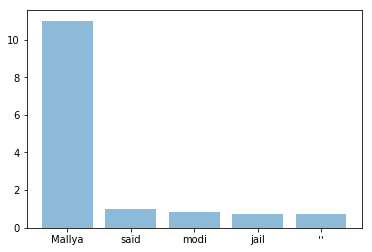

In [24]:
y_pos = np.arange(len(weight))
performance=list(weight.values())

weight_=sorted(weight,key=weight.get,reverse=True)
weight_=weight_[0:5]
weight_val=[]
for i in weight_:
    weight_val.append(weight[i])

plt.bar(weight_, weight_val, align='center', alpha=0.5)
plt.show()

In [25]:
threshold=3
selected=sorted(list(weight_sent.values()),reverse=True)[0:threshold]
for sent,weight in weight_sent.items():
    if weight in selected:
        print(sent,". ")


congress president rahul gandhi friday slammed prime minister narendra modi alleging he ran his government for 15 of his friends and he wondered why no big-ticket defaulters of bank loans like vijay mallya were not in jail . 
 gandhi said when his party is voted to power, no farmer "is going to be put in jail for not paying back his bank loan, it is not fair that the richest people do not go to jail but farmers go to jail for the same offence" . 
 gandhi said his party and its allies will never allow tamil nadu people to be ruled by nagpur (the rss) and expressed confidence that dmk chief m k stalin will soon be the chief minister of the state . 
